<a href="https://colab.research.google.com/github/vivek16pawar/Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

ML PipeLine
- Importing Libraries
- Downloading Data
- Checking Data
- Some Data Manuplation
- Exploraitory Data Analysis
- Feature Engineering
- Standardize the numerical variable
- Split data into Train And Test
- Select Algorithim suitable for problem
- Building and Training Model
- Validating the model
- Compating with Base Line Model
- Hyper Parameter Tunning
- Putting parameter together and Making Predictions

##Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sklearn


##Downloading Data

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading dataset csv file
ross_df = pd.read_csv('/content/drive/MyDrive/Module 4/Rental Sales Prediction/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Module 4/Rental Sales Prediction/ store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Checking Data

In [ ]:
# checking top 5 records of ross_df
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# checking top 5 records of store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# merging ross_df and store_df to create single dataframe
merge_df = ross_df.merge(store_df,on='Store',how='left')

In [ ]:
# checking top 5 records of merged dataframe
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# info of merged dataframe
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# getting stats of numerical features in data frame
merge_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


#Data Manupilation

In [ ]:
# Function for splitting date into year,month,day,weekofyear
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
# appling splitting date unction
split_date(merge_df)

In [ ]:
# checking records after applying functions
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


# Exploraitory Data Analysis

## When Store are Closed ?

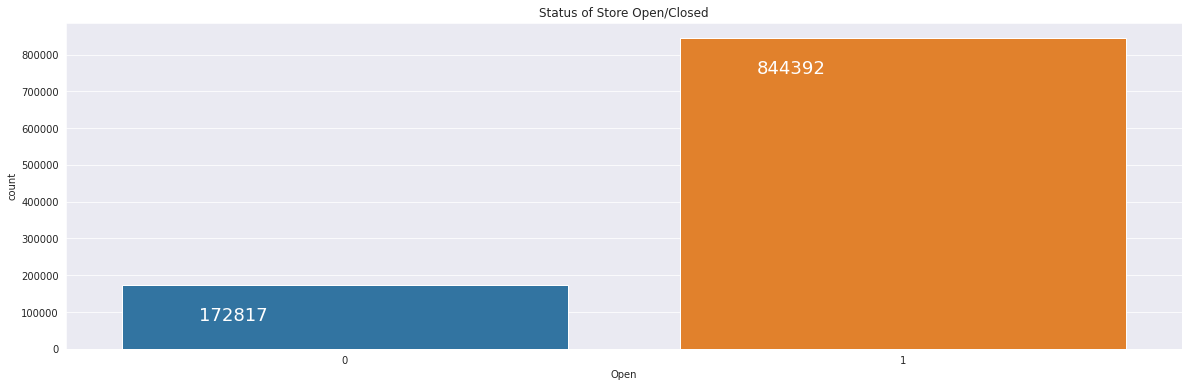

In [ ]:
# Getting Status of Store Wheather it is Open or Closed
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Status of Store Open/Closed")
ax = sns.countplot(x = 'Open', data = merge_df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

Over those two years, 172817 is the number of times that different stores closed on given days.

In [ ]:
# Total days store closed when there is school holiday
merge_df[(merge_df.Open == 0) & (merge_df.SchoolHoliday == 1) & (merge_df.StateHoliday == '0') ].count()[0]

2263

From those closed events, 2263 times occured because there was a school holiday.

In [ ]:
# Number of records where either a bank holiday or easter or christmas
merge_df[(merge_df.Open == 0) &
         ((merge_df.StateHoliday == 'a') |
          (merge_df.StateHoliday == 'b') | 
          (merge_df.StateHoliday == 'c'))].count()[0]

30140

For Closed Event 30140 times it occured because of either a bank holiday or easter or christmas.

In [ ]:
# total instances where there is holiday
merge_df[(merge_df.Open == 0) & (merge_df.SchoolHoliday == 0) & (merge_df.StateHoliday == '0')].count()[0]

121482

- After reading the descrition of the this task, Rossman clearly stated that they were undergoing refurbishments sometimes and had to close. Most probably those were the times this event was happening.

- The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

## Effect of running Promotional Ads on Sales

In [ ]:
# percentage of store either running promo or not
100*merge_df.Promo.value_counts()/len(merge_df.Promo)

0    61.848548
1    38.151452
Name: Promo, dtype: float64

Around 62% Stores were not running promotion on that day

In [ ]:
# Average Sales when there is no promotional camapagin running
Sales_with_no_promo = merge_df[(merge_df.Promo == 0) & (merge_df.Sales)].mean().sort_values(ascending = False)[0]
print(Sales_with_no_promo)

5928.965569239575


In [ ]:
# Average Sales when there is promotional camapagin running
Sales_with_promo = merge_df[(merge_df.Promo == 1) & (merge_df.Sales)].mean().sort_values(ascending = False)[0]
print(Sales_with_promo)

8223.920367241544


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x432 with 0 Axes>

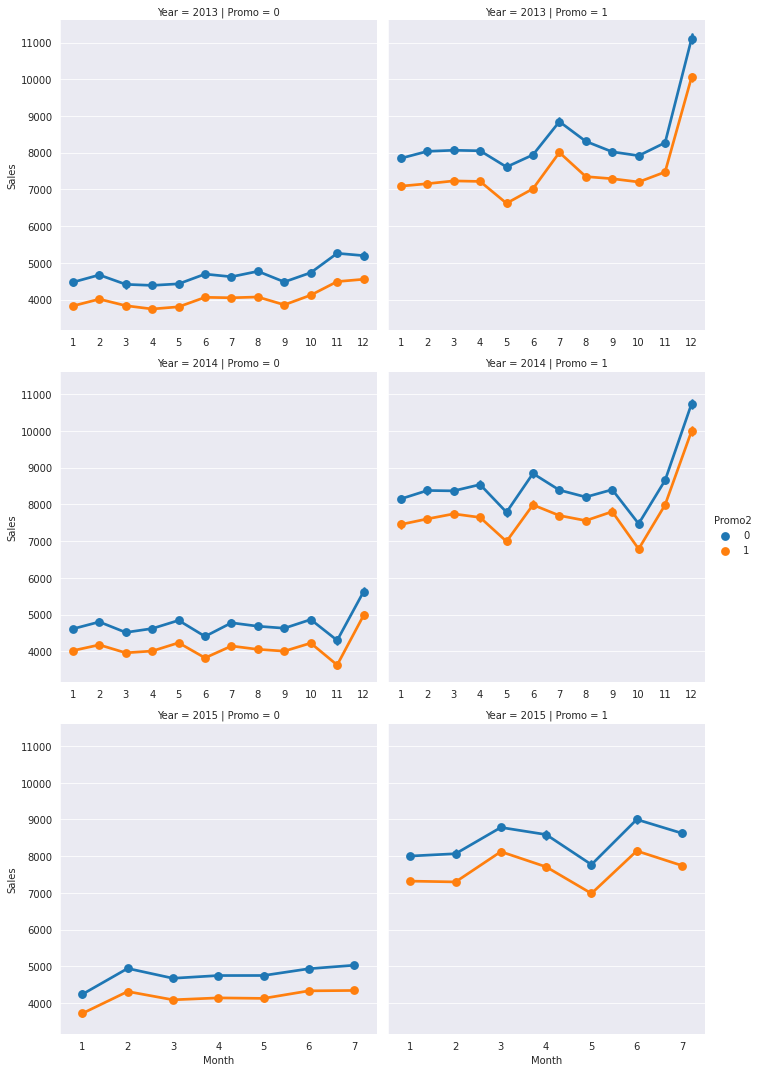

In [ ]:
#graphs plotting
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.factorplot(data = merge_df , x = 'Month', y = 'Sales',
               col = 'Promo',
               hue = 'Promo2',
               row = 'Year',
            sharex = False);

- Analysis clearly states that if we run promotional advertisment then there is jump in average sales, So we can say running promotion is benefical for stores.

- If we look over the years,there is a slight increase Year over Year but we don't see any major change from 2013 to 2015 and we actually see a very similair pattern in the months over the years with major spikes first around Easter period in March and April then in Summer in May,June and July and then finally around the Christmas period in November and December.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x432 with 0 Axes>

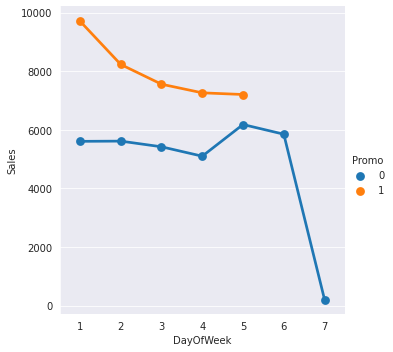

In [ ]:
# lotting graphs
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.factorplot(data = merge_df, x ="DayOfWeek", y = "Sales",
                hue='Promo');

In [ ]:
# number of shops open on sunday
merge_df[(merge_df.Open == 1) & (merge_df.DayOfWeek == 7)]['Store'].unique().shape[0]

33

Only 33 stores are open on sunday

In [ ]:
# Average Sales on Sunday
merge_df[(merge_df.Open == 1) & (merge_df.DayOfWeek == 7)]['Sales'].mean()

8224.723907598107

For Sunday since a very few stores opens on Sundays (only 33);if anyone needs anything urgently and don't have the time to get it during the week, he will have to do some distance to get to the open ones even if it's not close to his house. This means that those 33 open stores on Sunday actually accounts for the potential demand if all Rossman Stores were closed on Sundays. This clearly shows us how important it is for stores to be opened on Sundays.

## Promotional Ads and Customers Count

In [ ]:
# Customers Count when there is no promotional ads running
no_ads_cust = merge_df[(merge_df.Promo == 0) & (merge_df.Customers)].mean()[3]

In [ ]:
# Customers Count when there is promotional ads running
ads_cust = merge_df[(merge_df.Promo == 1) & (merge_df.Customers)].mean()[3]

In [ ]:
# perceentage increase in customer when ads are running
percentage_increase_cust = 100*(ads_cust - no_ads_cust)/(ads_cust + no_ads_cust)
print(percentage_increase_cust)

9.665641134987318


Running promotional ads gives 9% hike in customers

###Percentage Shop Running continous Promotions

In [ ]:
# null values in percentage
merge_df.count(0)/merge_df.shape[0]*100

Store                        100.000000
DayOfWeek                    100.000000
Date                         100.000000
Sales                        100.000000
Customers                    100.000000
Open                         100.000000
Promo                        100.000000
StateHoliday                 100.000000
SchoolHoliday                100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.740270
CompetitionOpenSinceMonth     68.212236
CompetitionOpenSinceYear      68.212236
Promo2                       100.000000
Promo2SinceWeek               50.056380
Promo2SinceYear               50.056380
PromoInterval                 50.056380
Year                         100.000000
Month                        100.000000
Day                          100.000000
WeekOfYear                   100.000000
dtype: float64

The Promo2SinceWeek,Promo2SinceYear and PromoInterval variables has almost 51% fill rate since they are actually NULL values because there are no continuous promotion for those stores

## Competition Distance vs Customers

In [ ]:
#CompetitionDistance less than 500
merge_df[(merge_df.CompetitionDistance <= 500) & (merge_df.Sales)].mean()[2]

7612.162124854226

In [ ]:
#CompetitionDistance between 500 and 1000
merge_df[(merge_df.CompetitionDistance.between(500,1000,inclusive = 'both')) & (merge_df.Sales)].mean()[2]

6688.99402617106

In [ ]:
# CompetitionDistance greater than 2000
merge_df[(merge_df.CompetitionDistance < 2000) & (merge_df.Customers)].mean()[3]

881.9547414020258

## Best Store Type

In [ ]:
# sales per customer
merge_df['SalesperCustomer'] = merge_df.Sales/merge_df.Customers

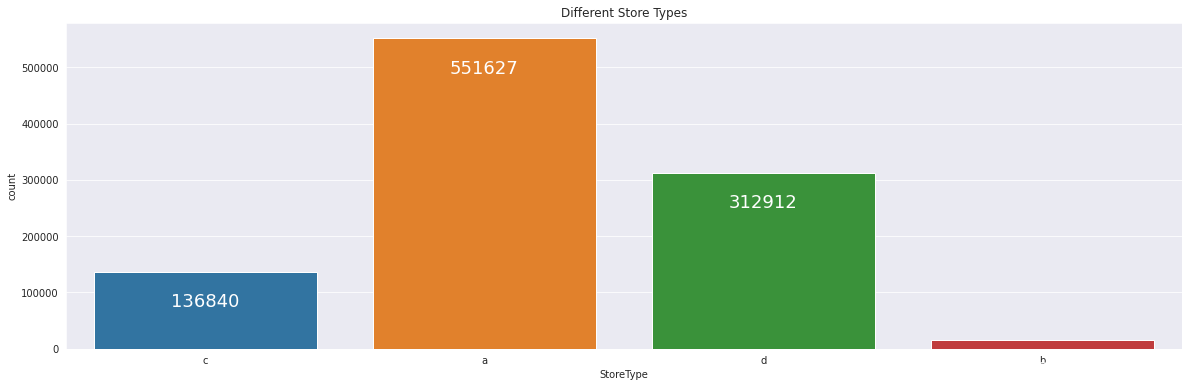

In [ ]:
# Number of stores per type
sns.set_style('darkgrid')
sns.color_palette("hls", 8)
plt.figure(figsize=(20,6))
plt.title("Different Store Types")
ax = sns.countplot(x = 'StoreType', data = merge_df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+0.8), ha='center', va='top', color='white', size=18)
plt.show()


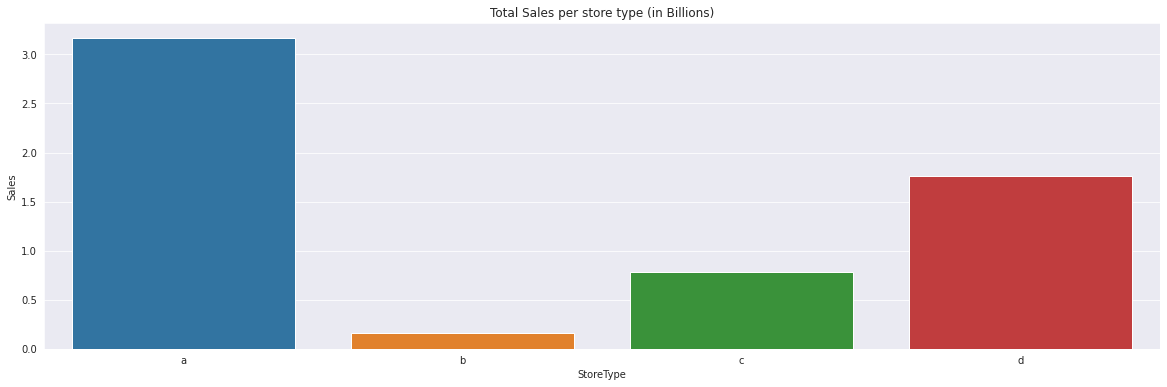

In [ ]:
# Total Sales per store type
sns.set_style('darkgrid') 
plt.figure(figsize=(20,6))
plt.title("Total Sales per store type (in Billions)")
ax = sns.barplot(merge_df.groupby(by="StoreType").sum().Sales.index,merge_df.groupby(by="StoreType").sum().Sales/1e9,errwidth=0)



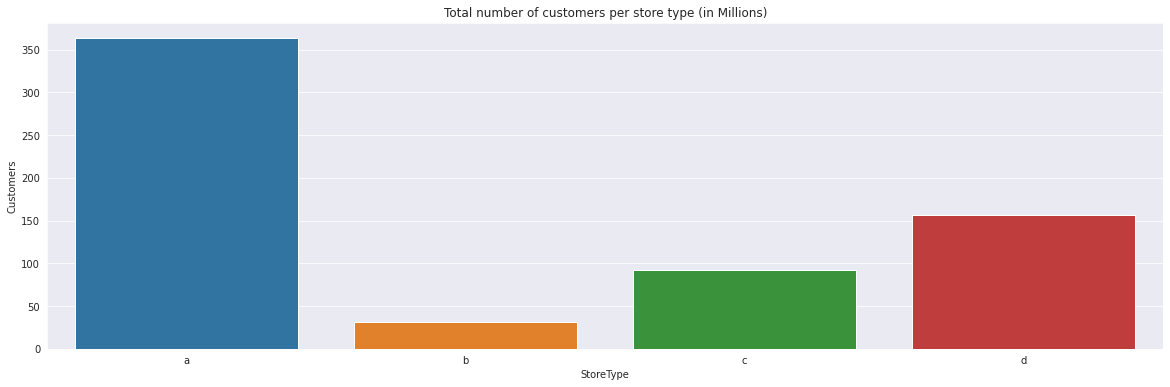

In [ ]:
# Number of customer per store type

sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Total number of customers per store type (in Millions)")
ax = sns.barplot(merge_df.groupby(by="StoreType").sum().Customers.index,merge_df.groupby(by="StoreType").sum().Customers/1e6,errwidth=0)



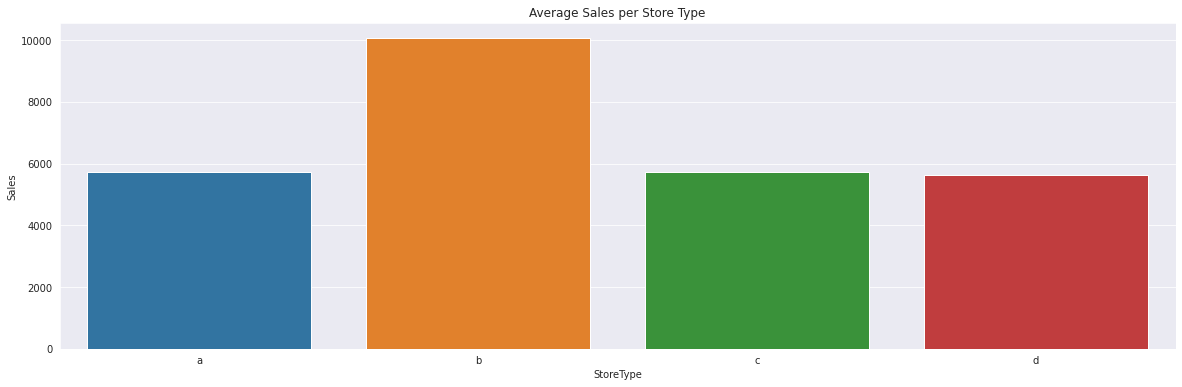

In [ ]:
#Avg Sales per store type
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Average Sales per Store Type")
ax = sns.barplot(merge_df.groupby(by="StoreType").sum().Sales.index,merge_df.groupby(by="StoreType").mean().Sales,errwidth=0)



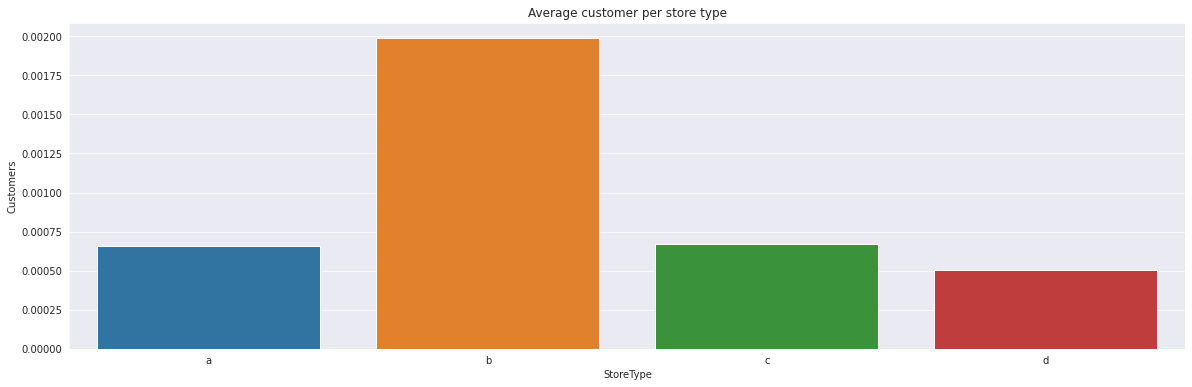

In [ ]:
#Avg customer per store type
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Average customer per store type")
ax = sns.barplot(merge_df.groupby(by="StoreType").sum().Customers.index,merge_df.groupby(by="StoreType").mean().Customers/1e6,errwidth=0)



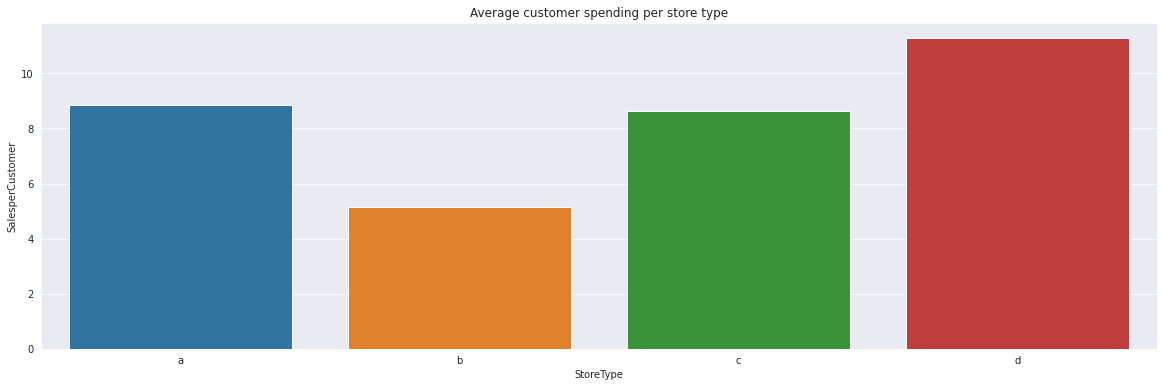

In [ ]:
#Avg customer spending per store type
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
plt.title("Average customer spending per store type")
ax = sns.barplot(merge_df.groupby(by="StoreType").sum().Sales.index,merge_df.groupby(by="StoreType").mean().SalesperCustomer,errwidth=0)



- Storetype A has the highest number of stores,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

- When looking at the average sales and number of customers, actually it is Storetype B who was the highest average Sales and highest average Number of Customers. One assumption could be that if B has only 17 stores but such a high amount of average sales and customers, whereas A would be smaller in size but much more present.

- Surprisingly it is StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest which means each customer will buy more since he knows there isn't a lot of similair shops around.

## Assortments and store type

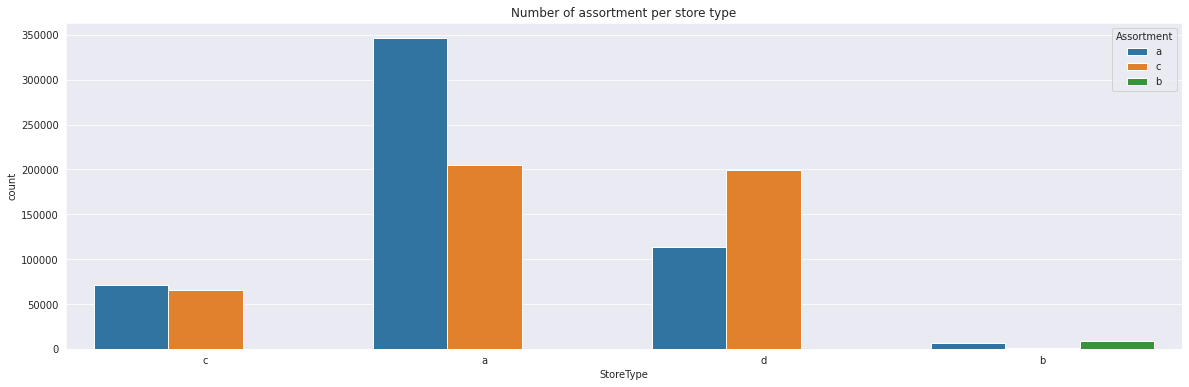

In [ ]:
# Graph plot Number of assortment per store type
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.countplot(x = 'StoreType', hue = 'Assortment', data=merge_df).set_title('Number of assortment per store type');

In [ ]:
# assotments_per_store_type
assotments_per_store_type = merge_df.groupby(by = ['StoreType','Assortment']).Assortment.count()
assotments_per_store_type

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

- We can clearly see here that most of the stores have either a assortment type or c assortment type.
- Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.

##Sales Analysis

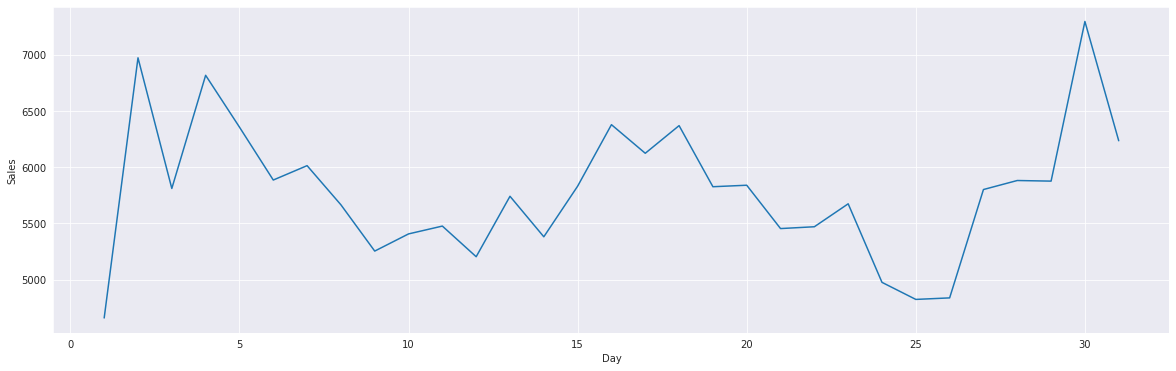

In [ ]:
# Graph plot day vs sales
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.color_palette("Set2")
sns.lineplot(data = merge_df, x = 'Day', y = 'Sales',markers=True,ci=None)

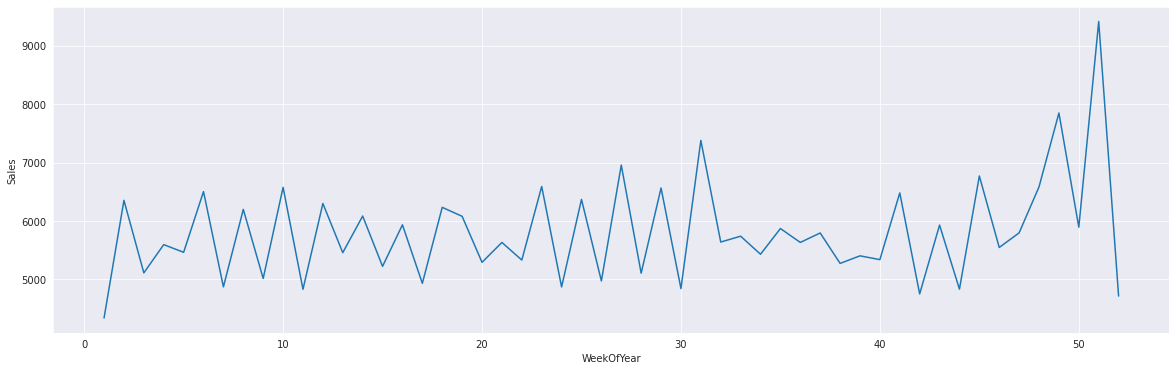

In [ ]:
# Graph plot weekofyear vs sales
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.color_palette("Set2")
sns.lineplot(data = merge_df, x = 'WeekOfYear', y = 'Sales',markers=True,ci=None)

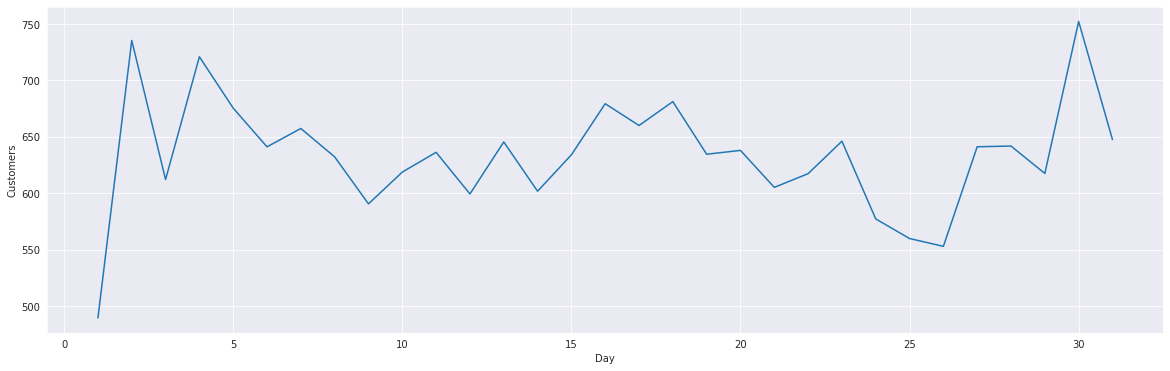

In [ ]:
# Graph plot day vs customers
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.color_palette("Set2")
sns.lineplot(data = merge_df, x = 'Day', y = 'Customers',markers=True,ci=None)

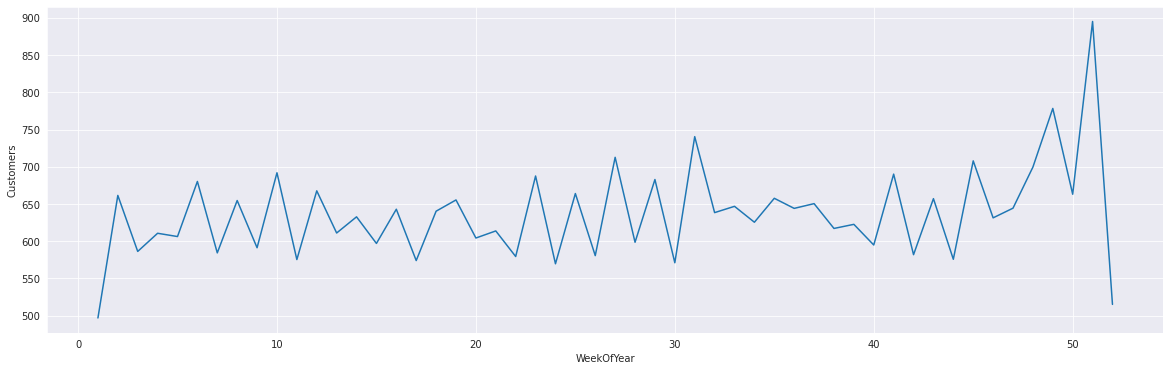

In [ ]:
# Graph plot weekofyear vs customers
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.color_palette("Set2")
sns.lineplot(data = merge_df, x = 'WeekOfYear', y = 'Customers',markers=True,ci=None)

In [ ]:
# imort test treain split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# splitting data
merged_df, merged_test_df = train_test_split(merge_df, test_size=0.3, random_state=42)

In [ ]:
# Check the shape of train dataset
print(merged_df.shape)

# Check the shape of test dataset
print(merged_test_df.shape)

(712046, 23)
(305163, 23)


In [ ]:
# columns of datasets
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'SalesperCustomer'],
      dtype='object')

#Preprocessing and feature engineering

In [ ]:
# data set info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712046 entries, 817013 to 121958
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      712046 non-null  int64         
 1   DayOfWeek                  712046 non-null  int64         
 2   Date                       712046 non-null  datetime64[ns]
 3   Sales                      712046 non-null  int64         
 4   Customers                  712046 non-null  int64         
 5   Open                       712046 non-null  int64         
 6   Promo                      712046 non-null  int64         
 7   StateHoliday               712046 non-null  object        
 8   SchoolHoliday              712046 non-null  int64         
 9   StoreType                  712046 non-null  object        
 10  Assortment                 712046 non-null  object        
 11  CompetitionDistance        710197 non-null  flo

In [ ]:
# dropping SalesperCustomer column
merged_df.drop('SalesperCustomer', axis = 1, inplace = True)

In [ ]:
# function for competition open column
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
# applying competition open function
comp_months(merged_df)
comp_months(merged_test_df)


In [ ]:
# creating function for Months since Promo2 and promotions was started in the current month
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [ ]:
# mapping stateholiday
merged_df["StateHoliday"] = merged_df['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1 , 0: 1})
merged_test_df["StateHoliday"] =  merged_test_df['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1 , 0: 1})

In [ ]:
# applying function of  promotions was started in the current month
promo_cols(merged_df)
promo_cols(merged_test_df)

In [ ]:
# input and target column names
input_cols = [ 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [ ]:
# input and target data
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [ ]:
# testing data
test_inputs = merged_test_df[input_cols].copy()
test_targets = merged_test_df[target_col].copy()

In [ ]:
# numerical and categorical columns
numeric_cols = [ 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [ ]:
# unique values in stateholiday columns
merged_df['StateHoliday'].unique()

array([0, 1])

In [ ]:
# total nan values in numeical columns in training set
inputs[numeric_cols].isna().sum()

Promo                     0
SchoolHoliday             0
CompetitionDistance    1849
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [ ]:
# total nan values in numeical columns in testing set
test_inputs[numeric_cols].isna().sum()

Promo                    0
SchoolHoliday            0
CompetitionDistance    793
CompetitionOpen          0
Promo2                   0
Promo2Open               0
IsPromo2Month            0
Day                      0
Month                    0
Year                     0
WeekOfYear               0
dtype: int64

In [ ]:
# getting max value in CompetitionDistance
max_distance = inputs.CompetitionDistance.max()

In [ ]:
# replacing nan values in CompetitionDistance with max values
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

## Scaling

In [ ]:
# importing Minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scaling numerical features
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
# transforming the scale
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

## Encoding

In [ ]:
# Importing onehotencoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# applying onehotencoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [ ]:
# transform encoding
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
# adding numeric columns and encoded columns
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Modeling

# Decision Tree Regression

In [ ]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
tree = DecisionTreeRegressor()

In [ ]:
# fitting tree to training dataset
tree.fit(X,targets)

DecisionTreeRegressor()

In [ ]:
# predicting y from training dataset
y_pred=tree.predict(X_test)

In [ ]:
# R2 score
r2_score(test_targets, y_pred)


0.8604220776565205

In [ ]:
# Adjusted r2
print("Adjusted R2 : ",1-(1-r2_score((test_targets), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8604097270448132


In [ ]:
# MSE and RMSE
MSE  = mean_squared_error(test_targets, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2071290.2806024977
RMSE : 1439.197790646754


In [ ]:
# MAE
MAE  = mean_absolute_error(test_targets, y_pred)
print("MAE :" , MAE)

MAE : 770.2735357825162


Text(0, 0.5, 'Predicted')

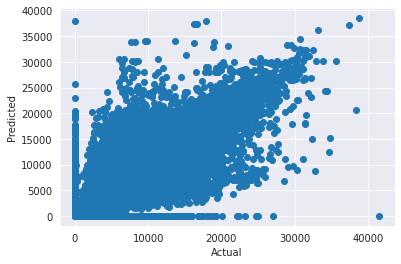

In [ ]:
# Scatter plot of actual vs predicted
plt.scatter(test_targets, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

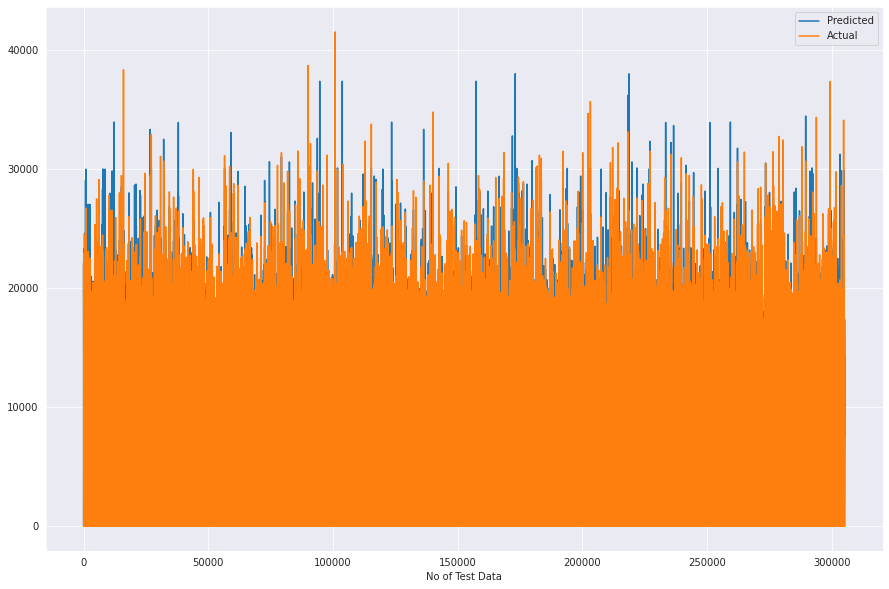

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(test_targets))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
# feature importance
tree.feature_importances_

array([0.0782516 , 0.00515802, 0.21717246, 0.06788953, 0.01081511,
       0.02026882, 0.00133666, 0.02653028, 0.02101954, 0.04141565,
       0.0297275 , 0.0208401 , 0.00320519, 0.00161137, 0.001459  ,
       0.00300962, 0.00827894, 0.34740562, 0.00980557, 0.01209553,
       0.01053206, 0.03102039, 0.00846962, 0.0077801 , 0.01025911,
       0.00039431, 0.00424828])

In [ ]:
# features
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

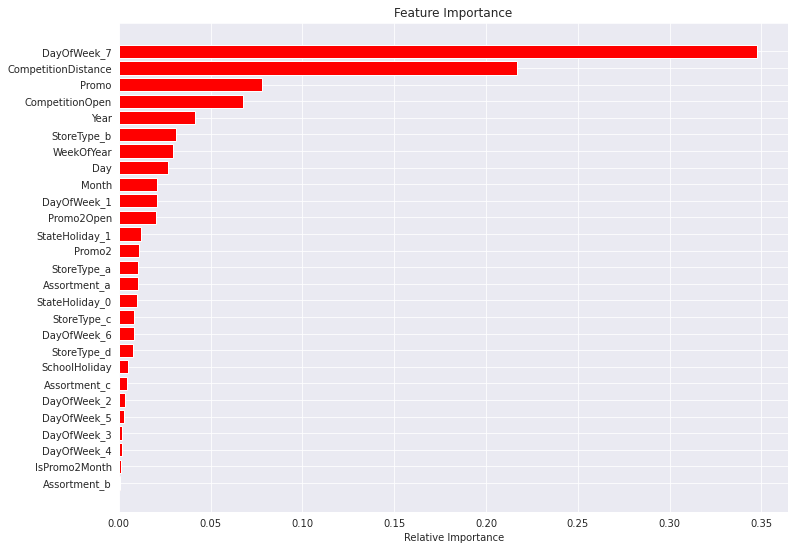

In [ ]:
# plotting feeature importance
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# GradiantBoosting 

In [ ]:
# importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
ensemble = GradientBoostingRegressor()

In [ ]:
#fitting model to dataset
ensemble.fit(X,targets)

GradientBoostingRegressor()

In [ ]:
#  y prediction
y_pred=ensemble.predict(X_test)

In [ ]:
#R2
r2_score(test_targets, y_pred)

0.6124731893419665

In [ ]:
# Adjusted R2
print("Adjusted R2 : ",1-(1-r2_score((test_targets), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.6124388988676264


In [ ]:
# MSE and RMSE
MSE  = mean_squared_error(test_targets, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 5750769.91340792
RMSE : 2398.0762943259165


In [ ]:
# MAE
MAE  = mean_absolute_error(test_targets, y_pred)
print("MAE :" , MAE)

MAE : 1648.667103953332


Text(0, 0.5, 'Predicted')

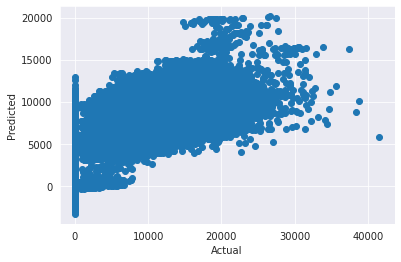

In [ ]:
# Scatter plot of actual vs predicted
plt.scatter(test_targets, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# RandomForest

In [ ]:
# importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ensemble_regressior = RandomForestRegressor()

In [ ]:
# fitting model to data
ensemble_regressior.fit(X,targets)

RandomForestRegressor()

In [ ]:
#y prediction
y_pred=ensemble_regressior.predict(X_test)

In [ ]:
#R2
r2_score(test_targets, y_pred)

0.9245287902716922

In [ ]:
#Adjusted R2 
print("Adjusted R2 : ",1-(1-r2_score((test_targets), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.9245221121696631


In [ ]:
# MSE and RMSE
MSE  = mean_squared_error(test_targets, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1119967.8326696286
RMSE : 1058.2853266816226


In [ ]:
# MAE
MAE  = mean_absolute_error(test_targets, y_pred)
print("MAE :" , MAE)

MAE : 584.2232425538232


Text(0, 0.5, 'Predicted')

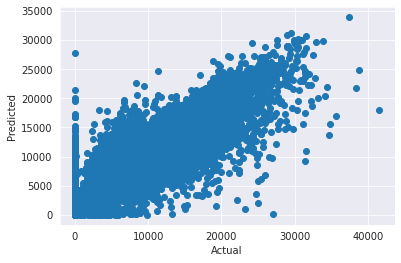

In [ ]:
# Scatter plot Actual vs Prediction
plt.scatter(test_targets, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost

In [ ]:
# Importing XGBRegressor
from xgboost import XGBRegressor

In [ ]:
# model fitting
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
%%time
model.fit(X, targets)

[11:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 33.7 s, sys: 506 ms, total: 34.2 s
Wall time: 18.1 s


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [ ]:
# prediction
preds = model.predict(X)

In [ ]:
# prediction
preds

array([5660.737 , 1933.0354, 5249.4126, ..., 5355.5986, 6517.689 ,
       7745.092 ], dtype=float32)

In [ ]:
# RMSE function
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
#RMSE
rmse(preds, targets)

2722.349559081276

In [ ]:
# RC params
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

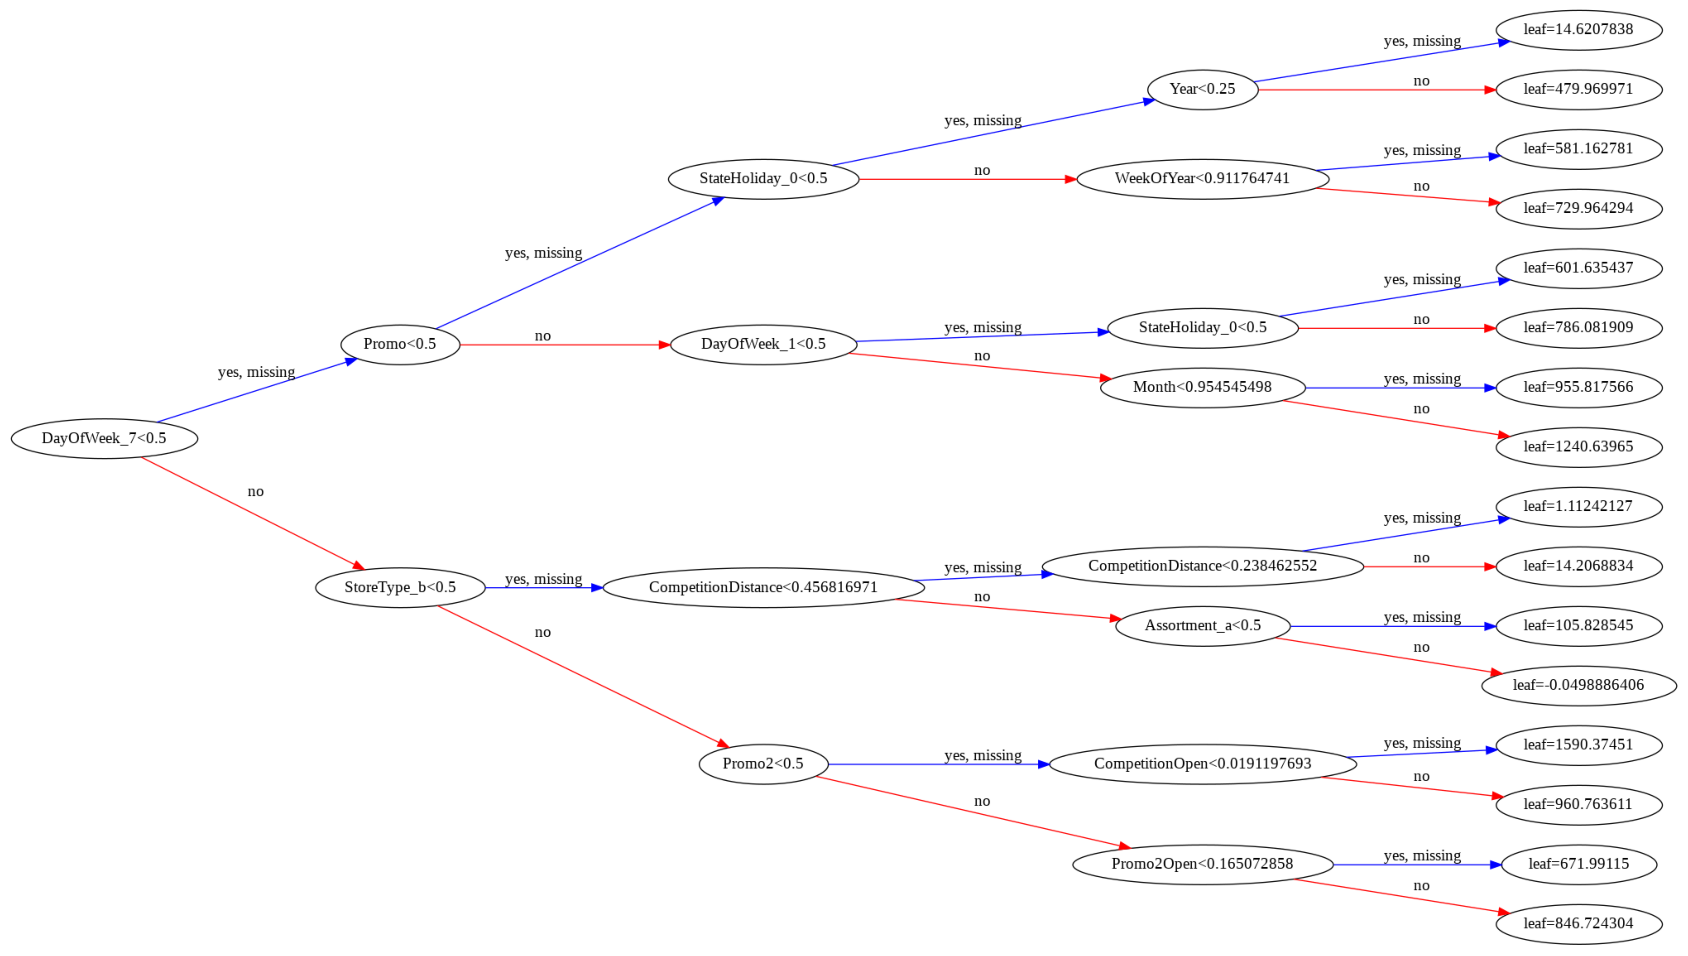

In [ ]:
# plotting tree
plot_tree(model, rankdir='LR');

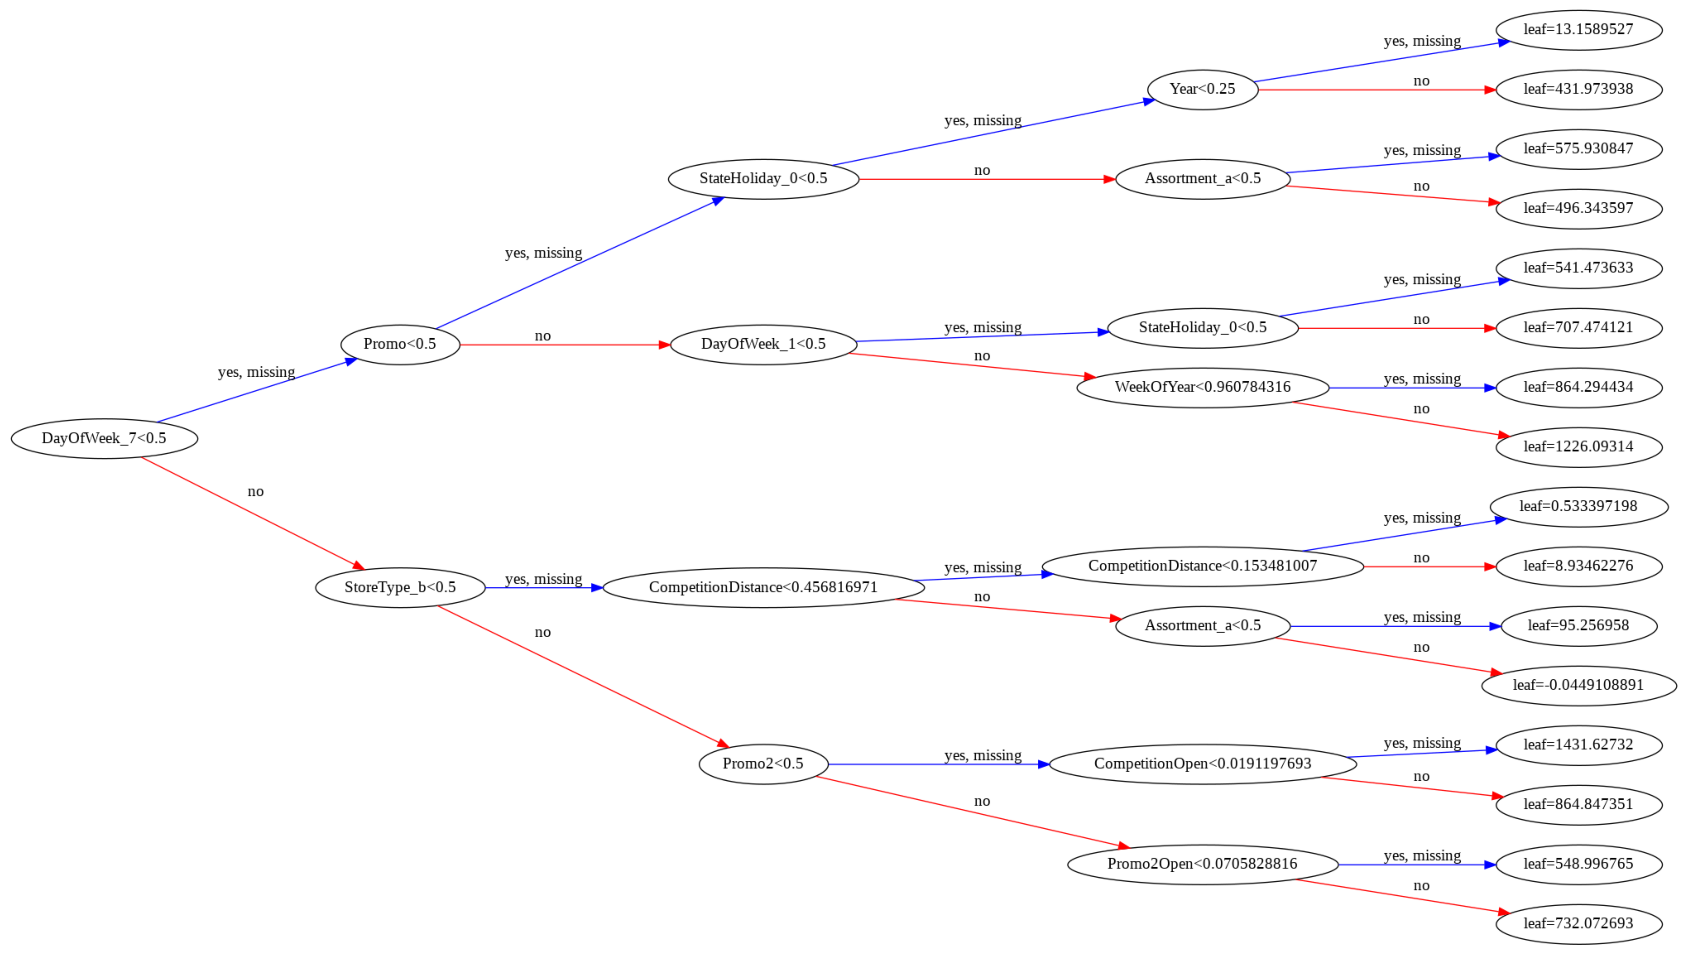

In [ ]:
# plotting tree
plot_tree(model, rankdir='LR', num_trees=1);

In [ ]:
# getting feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
# feature importance
importance_df.head(10)

,feature,importance
17,DayOfWeek_7,0.582820
0,Promo,0.160645
11,DayOfWeek_1,0.048385
9,Year,0.044918
18,StateHoliday_0,0.033692
21,StoreType_b,0.026146
8,Month,0.020609
12,DayOfWeek_2,0.017583
24,Assortment_a,0.014411
10,WeekOfYear,0.013161


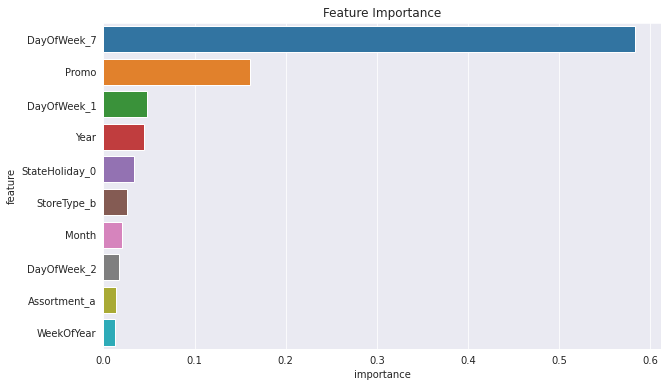

In [ ]:
# Plotting feature importane
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
# Importing K fold
from sklearn.model_selection import KFold

In [ ]:
# Function for training and evaluation
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [ ]:
# K fold 
kfold = KFold(n_splits=5)

In [ ]:
# Model
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[11:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2721.73353209603, Validation RMSE: 2727.362792485462
[11:54:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2722.743203474255, Validation RMSE: 2712.606870273628
[11:54:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2739.2888770344425, Validation RMSE: 2730.856885868654
[11:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2727.9130350270457, Validation RMSE: 2720.052260337124
[11:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2704.7642043148003, Validation RMSE: 2727.0412056252676


In [ ]:
# Prediction Avg
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
# Y pred
preds = predict_avg(models, X)

In [ ]:
# pred
preds

array([5773.8555, 2049.0198, 5226.081 , ..., 5286.651 , 6548.694 ,
       7712.0874], dtype=float32)

In [ ]:
# test_params_kfold
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [ ]:
# spliting data
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)


In [ ]:
# parameters
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
#n_estimators
test_params(n_estimators=10)

[11:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 3551.4937617999453, Validation RMSE: 3550.982446580725


In [ ]:
#n_estimators
test_params(n_estimators=30)

[11:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2644.573159366047, Validation RMSE: 2640.316934064395


In [ ]:
#n_estimators
test_params(n_estimators=100)

[11:56:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2391.289518683447, Validation RMSE: 2386.1419400901887


In [ ]:
#n_estimators
test_params(n_estimators=240)

[11:56:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2224.7191277571483, Validation RMSE: 2220.4728790549434


In [ ]:
# max depth
test_params(max_depth=2)

[11:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2525.5844175911607, Validation RMSE: 2519.534568717281


In [ ]:
# max depth
test_params(max_depth=5)

[11:59:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2123.1468282622864, Validation RMSE: 2122.9821010350174


In [ ]:
# max depth
test_params(max_depth=10)

[12:01:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1312.8392064961877, Validation RMSE: 1362.2955325594924


In [ ]:
#learning_rate
test_params(n_estimators=50, learning_rate=0.01)

[12:05:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 4748.544728335552, Validation RMSE: 4748.989284237495


In [ ]:
#learning_rate
test_params(n_estimators=50, learning_rate=0.1)

[12:05:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2504.2481306520153, Validation RMSE: 2500.096802643469


In [ ]:
#learning_rate
test_params(n_estimators=50, learning_rate=0.3)

[12:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2308.4971323408727, Validation RMSE: 2302.915437931645


In [ ]:
#learning_rate
test_params(n_estimators=50, learning_rate=0.9)

[12:06:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2043.366450879218, Validation RMSE: 2054.2304439696723


In [ ]:
#learning_rate
test_params(n_estimators=50, learning_rate=0.99)

[12:07:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2111.733473581005, Validation RMSE: 2110.3524111818847


## Combine All hyper parameters

In [ ]:
# Model with hyper parameter tunning
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [ ]:
%%time
model.fit(X, targets)

[12:07:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1h 2min 46s, sys: 4.88 s, total: 1h 2min 50s
Wall time: 32min 12s


XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, random_state=42, subsample=0.9)

In [ ]:
# Test pred
test_preds = model.predict(X_test)